In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
X=np.array([[0,0,1,1],[0,1,0,1]])
y=np.array([[0,1,1,0]])
# number of input neurons
ni=2
# number of hidden neurons
nh=2
# number of output neurons
no=1
lr=0.1
#number of training example
m=X.shape[1]
#define random seen for consistent results
np.random.seed(1)
#define wts for neural network
w1=np.random.randn(nh,ni)
w2=np.random.randn(no,nh)
loss=[]

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def forward_prop(w1,w2,x):
    z1=np.dot(w1,x)
    a1=sigmoid(z1)
    z2=np.dot(w2,a1)
    a2=sigmoid(z2)
    return a1,a2
def back_prop(m,w1,w2,a1,a2,x,y):
    dz2=a2-y
    dw2=np.dot(dz2,a1.T)/m
    dz1=np.dot(w2.T,dz2)*a1*(1-a1)
    dw1=np.dot(dz1,x.T)/m
    dw1=np.reshape(dw1,w1.shape)
    dw2=np.reshape(dw2,w2.shape)
    return dw1,dw2

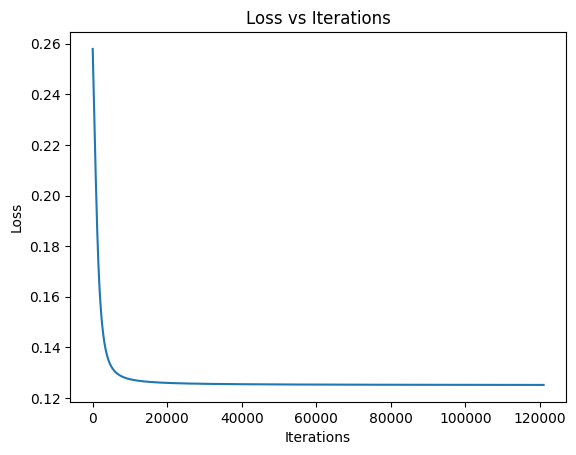

In [ ]:
for i in range(10000):
    a1, a2 = forward_prop(w1, w2, X)
    dw1, dw2 = back_prop(m, w1, w2, a1, a2, X, y)
    w1 = w1 - lr * dw1
    w2 = w2 - lr * dw2
    loss.append(np.mean(np.square(y - a2)))
plt.plot(loss)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs Iterations')
plt.show()



In [ ]:
def predict2(w1,w2,x):
    a1,a2=forward_prop(w1,w2,x)
    a2=np.squeeze(a2)
    if a2>0.5:
        return 1
    else:
        return 0
    return a2

In [ ]:
test=np.array([[0,0],[0,1],[1,0],[1,1]])
predict1=[]
for i in range(test.shape[0]): # Correct the loop range to iterate over rows
    predict1.append(predict2(w1,w2,test[i,:])) # Pass the entire row as input
print(predict1)

[0, 0, 1, 1]
